Getting the project root path

In [ ]:
import os
root = os.path.dirname(os.getcwd())

Loading the data

In [2]:
import pandas as pd

data = pd.read_csv(os.path.join(root, "data", "raw", "test_data_CANDIDATE.csv"))
data.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,nar,hc,sk,trf
0,0,49,M,10000,130,269.0,0,1,163,0,0.0,2.0,0,2,2,0,1,6797.761892
1,1,61,F,10000,138,166.0,0,0,125,1,3.6,NaN,1,2,2,1,3,4307.686943
2,2,46,F,10000,140,311.0,0,1,120,1,1.8,NaN,2,3,2,0,1,4118.077502
3,3,69,F,10000,140,254.0,0,0,146,0,2.0,1.0,3,3,2,1,0,7170.849469
4,4,51,F,10000,100,222.0,0,1,143,1,1.2,1.0,0,2,2,1,0,5579.040145


## The data in this columns is not so relevant

In [3]:
del data['cp']
del data['nar']

Cheacking if each column has num values

In [4]:
 data.isna().any()

index       False
age         False
sex         False
trestbps    False
chol         True
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope        True
ca          False
thal        False
hc          False
sk          False
trf         False
dtype: bool

# Missing data
There is missing data on the chol and slope columns

The chol could be replaced by the mean and the slop by 0.

In [5]:
data.slope = data.slope.fillna(0)

Cheack amount of null for each gender and the mean of chol

In [6]:
# Treating different names for male and female
data.sex = data.sex.replace('f', 'F')
data.sex = data.sex.replace('m', 'M')

In [7]:
male = data.sex == 'M'
male_mean = int(data[male].chol.mean())
male_amount = data[male].chol.isna().sum()

female = data.sex == 'F'
female_mean = int(data[female].chol.mean())
female_amount = data[female].chol.isna().sum()

print("Chol male mean({}), amount ({})".format(male_mean, male_amount))
print("Chol female mean({}), amount({})".format(female_mean, female_amount))


Chol male mean(262), amount (1)
Chol female mean(236), amount(15)


This number could sujest that if the the value chol is nan its probably gonna be a female, but since I presume that is just a coinsidence I will not do something about. 

Since female is the biggest gend the missing data will be filled by the female mean.

In [8]:
data.chol = data.chol.fillna(female_mean)

## Check amount of each gender for base line model

In [9]:
print(" Male: {} \n Female: {}".format(len(data[male]), len(data[female])))

 Male: 92 
 Female: 196


Any model with acc bellow ≃69% in this dataset is will poblaby not be good enough.

## Looking for patterns or outlayers

Age Density plot by gender

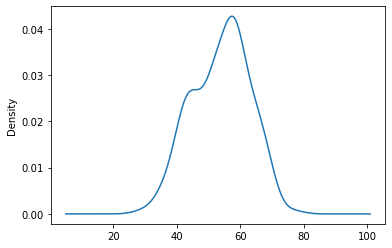

In [10]:
data[female].age.plot.kde()

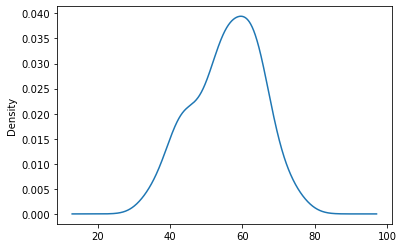

In [11]:
data[male].age.plot.kde()

Both distributions are preatty simmilar, I don't think that using that feature in to create models will do a significant improvment

# Looking for outlayers in the continuos data

## trestbps

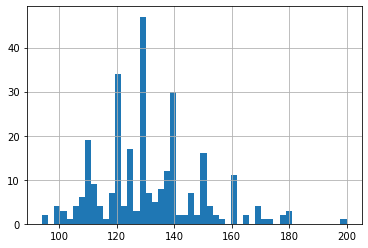

In [12]:
data.trestbps.hist(bins = 50)

Checking data where bps is bigger than 170

In [13]:
data[data.trestbps > 170]

,index,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hc,sk,trf
43,43,55,M,180,327.0,0,2,117,1,3.4,1.0,0,2,0,0,1074.863813
78,78,52,F,172,199.0,1,1,162,0,0.5,2.0,0,3,1,2,1163.752204
132,132,59,M,174,249.0,0,1,143,1,0.0,1.0,0,2,1,3,4053.961184
139,139,64,M,180,325.0,0,1,154,1,0.0,2.0,0,2,1,1,4963.373185
163,163,66,M,178,236.0,1,1,165,1,1.0,1.0,2,3,1,2,3744.701424
184,184,56,M,200,288.0,1,0,133,1,4.0,0.0,2,3,1,0,2865.909800
225,225,59,F,178,270.0,0,0,145,0,4.2,0.0,0,3,1,1,4428.170131
257,257,68,F,180,274.0,1,0,150,1,1.6,0.0,0,3,0,3,6076.197504


Considering that most of the samples are female we see an above averge number of males with this specific trestbps

## chol

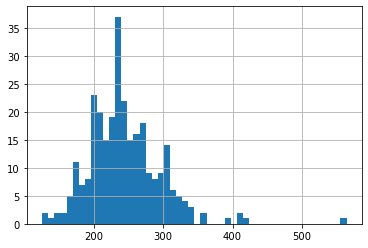

In [14]:
data.chol.hist(bins = 50)

In [15]:
data[data.chol > 335]

,index,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hc,sk,trf
40,40,67,M,115,564.0,0,0,160,0,1.6,1.0,0,3,1,2,5193.139768
69,69,57,M,120,354.0,0,1,163,1,0.6,0.0,0,2,1,2,6717.869526
70,70,65,M,160,360.0,0,0,151,0,0.8,0.0,0,2,2,2,905.805012
79,79,62,M,140,394.0,0,0,157,0,1.2,1.0,0,2,0,0,4270.421351
127,127,63,M,150,407.0,0,0,154,0,4.0,1.0,3,3,1,0,4976.962944
134,134,55,M,132,342.0,0,1,166,0,1.2,0.0,0,2,0,0,1236.110844
142,142,43,M,132,341.0,1,0,136,1,3.0,0.0,0,3,1,2,5687.050160
155,155,56,M,134,409.0,0,0,150,1,1.9,0.0,2,3,1,1,4167.831636
217,217,65,M,140,417.0,1,0,157,0,0.8,0.0,1,2,1,0,2949.268945
245,245,58,M,120,340.0,0,1,172,0,0.0,2.0,0,2,1,0,1036.260820


### Well I think that I found a pattern, so before the model run will be checked if chol > 335 so will be man

## thalach

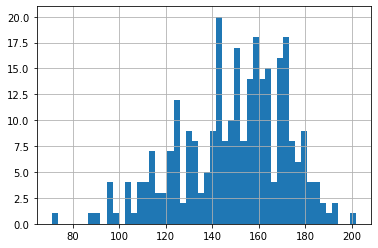

In [16]:
data.thalach.hist(bins = 50)

In [17]:
bigth = data[data.thalach > 180]
bigth.head()

,index,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hc,sk,trf
12,12,43,F,115,303.0,0,1,181,0,1.2,0.0,0,2,1,1,2698.932362
35,35,35,M,138,183.0,0,1,182,0,1.4,0.0,0,2,1,3,2070.473391
38,38,34,M,118,210.0,0,1,192,0,0.7,2.0,0,2,2,0,6349.652639
48,48,48,F,122,236.0,0,0,186,0,0.0,2.0,0,2,0,2,5655.767714
52,52,44,F,130,219.0,0,0,188,0,0.0,2.0,0,2,0,1,1724.935917


Comparing the amont of male and female

In [18]:
print("female({}) male({})".format(len(bigth[bigth.sex == 'F']), len(bigth[bigth.sex == 'M']))) 

female(14) male(2)


This ratio is similar to the dataset ratio of male/female so it not will be used

In [19]:
smallth = data[data.thalach < 100]

In [20]:
print("female({}) male({})".format(len(smallth[smallth.sex == 'F']), len(smallth[smallth.sex == 'M']))) 

female(6) male(2)


## oldPeak

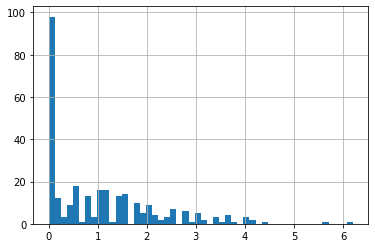

In [21]:
data.oldpeak.hist(bins = 50)

In [22]:
data[data.oldpeak >5]

,index,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hc,sk,trf
119,119,55,F,140,217.0,0,1,111,1,5.6,0.0,0,3,2,2,4111.912614
238,238,62,M,160,164.0,0,0,145,0,6.2,0.0,3,3,2,3,4102.510434


## transform trf to minutes and round them

In [23]:
data.trf = pd.DataFrame(data.trf.values / 60).astype(int)
data.head()

,index,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hc,sk,trf
0,0,49,M,130,269.0,0,1,163,0,0.0,2.0,0,2,0,1,113
1,1,61,F,138,166.0,0,0,125,1,3.6,0.0,1,2,1,3,71
2,2,46,F,140,311.0,0,1,120,1,1.8,0.0,2,3,0,1,68
3,3,69,F,140,254.0,0,0,146,0,2.0,1.0,3,3,1,0,119
4,4,51,F,100,222.0,0,1,143,1,1.2,1.0,0,2,1,0,92


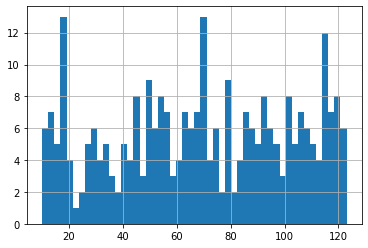

In [24]:
data.trf.hist(bins = 50)

In [25]:
less_driver = data[data.trf <20]
more_driver = data[data.trf >100]
print(" Less female({}) male({})".format(len(less_driver[less_driver.sex == 'F']), len(less_driver[less_driver.sex == 'M']))) 
print(" More female({}) male({})".format(len(more_driver[more_driver.sex == 'F']), len(more_driver[more_driver.sex == 'M']))) 

 Less female(19) male(12)
 More female(52) male(16)


## Loking for the patient hair color by sex

In [26]:
for i in [0, 1, 2]:
    hair = data[data.hc == i]
    print(" {} female({}) male({})".format(i, len(hair[hair.sex == 'F']), len(hair[hair.sex == 'M']))) 


 0 female(121) male(24)
 1 female(55) male(62)
 2 female(20) male(6)


This feature has some relation with sex

## Exploring CA

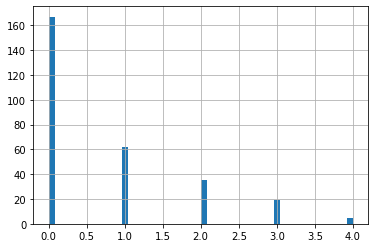

In [27]:
data.ca.hist(bins = 50)

I't was said in the description that was just 0-3 CA, but here there is an fourt.
I will treat the 4 as data error and delete de rows

In [28]:
data = data[data.ca != 4]

## Exploring Slope

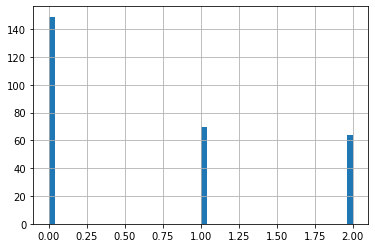

In [29]:
data.slope.hist(bins = 50)

In [30]:
for i in [0, 1, 2]:
    sl = data[data.slope == i]
    print(" {} female({}) male({})".format(i, len(sl[sl.sex == 'F']), len(sl[sl.sex == 'M']))) 

 0 female(100) male(49)
 1 female(46) male(24)
 2 female(45) male(19)


## The following classes would be better fit in models if turned into dummy vaiables
 * fbs
 * restecg
 * exang
 * ca
 * thal (this one even more than the others)
 * hc
 * sk
 * slope
 

In [31]:
for feature in [ 'fbs', 'restecg', 'exang', 'ca', 'thal', 'hc', 'sk', 'slope']:
    data = pd.concat([data, pd.get_dummies(data[feature], prefix = feature)], axis=1).drop([feature], axis=1)

data.head()

,index,age,sex,trestbps,chol,thalach,oldpeak,trf,fbs_0,fbs_1,...,hc_0,hc_1,hc_2,sk_0,sk_1,sk_2,sk_3,slope_0.0,slope_1.0,slope_2.0
0,0,49,M,130,269.0,163,0.0,113,1,0,...,1,0,0,0,1,0,0,0,0,1
1,1,61,F,138,166.0,125,3.6,71,1,0,...,0,1,0,0,0,0,1,1,0,0
2,2,46,F,140,311.0,120,1.8,68,1,0,...,1,0,0,0,1,0,0,1,0,0
3,3,69,F,140,254.0,146,2.0,119,1,0,...,0,1,0,1,0,0,0,0,1,0
4,4,51,F,100,222.0,143,1.2,92,1,0,...,0,1,0,1,0,0,0,0,1,0


In [32]:
print(list(data))

['index', 'age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'trf', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'hc_0', 'hc_1', 'hc_2', 'sk_0', 'sk_1', 'sk_2', 'sk_3', 'slope_0.0', 'slope_1.0', 'slope_2.0']


## Saving the data

In [33]:
data.to_csv(os.path.join(root, "data", "processed", "cleanData.csv"), index = False)